In [312]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

RANDOM_SEED = 42

In [313]:
df = pd.read_excel('data_2.xlsx')
df = df.drop(df.columns[[0, 1]], axis=1)
X = df.drop(['Ybin'], axis = 1)
y = df['Ybin']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.85,
                                                    random_state=RANDOM_SEED,
                                                    stratify=y)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [28 13]
Количество строк в y_test по классам: [6 2]


In [314]:
mean_X = X_train.mean()
std_X = X_train.std()

#нормализация тренировочных и тестовых данных
for column in X_train.columns:
    X_train[column] = (X_train[column] - mean_X[column]) / std_X[column]
    X_test[column] = (X_test[column] - mean_X[column]) / std_X[column]

In [315]:
knn = KNeighborsClassifier()
#создадим сетку параметров
grid_space={'n_neighbors': range(2,33,1)}
grid = GridSearchCV(knn, param_grid=grid_space, cv=5)
knn_model = grid.fit(X_train, y_train)
print(grid.best_params_)
#Делаем предсказания
knn_predictions = knn_model.predict(X_test)

print(classification_report(y_test, knn_predictions))

{'n_neighbors': 12}
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



In [316]:
logistic = LogisticRegression(solver='liblinear')
#создадим сетку параметров
grid_space={'penalty': ['l2', 'l1']}
grid = GridSearchCV(logistic, param_grid=grid_space, cv=5)
logistic_model = grid.fit(X_train, y_train)
print(grid.best_params_)
#Делаем предсказания
logistic_predictions = logistic_model.predict(X_test)

print(classification_report(y_test, logistic_predictions))

{'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



In [317]:
decision_tree = DecisionTreeClassifier(splitter ='best',random_state=RANDOM_SEED)
grid_space={'max_depth': range (1, 100, 1)}
grid = GridSearchCV(decision_tree, param_grid=grid_space, cv=5)
decision_tree_model = grid.fit(X_train, y_train)
print(grid.best_params_)
#Делаем предсказания
decision_tree_predictions = decision_tree_model.predict(X_test)

print(classification_report(y_test, decision_tree_predictions))

{'max_depth': 2}
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [318]:
forest = RandomForestClassifier(random_state=RANDOM_SEED)
grid_space={'max_depth': range (1, 20, 1)}
grid = GridSearchCV(forest, param_grid=grid_space, cv=5)
forest_model = grid.fit(X_train, y_train)
print(grid.best_params_)
#Делаем предсказания
forest_predictions = forest_model.predict(X_test)

print(classification_report(y_test, forest_predictions))

{'max_depth': 1}
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



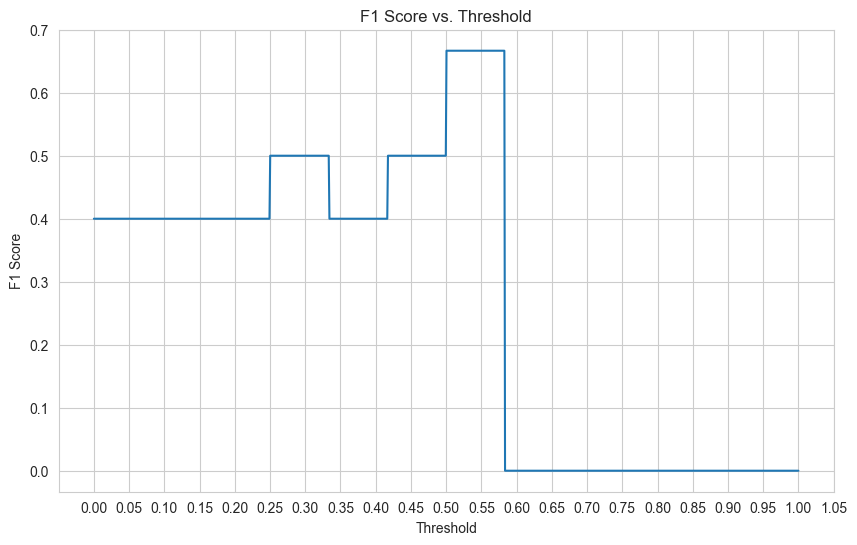

In [319]:
thresholds = np.linspace(0, 1, 1000)
f1_scores = []
y_scores = knn_model.predict_proba(X_test)[:,1]
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.title('F1 Score vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

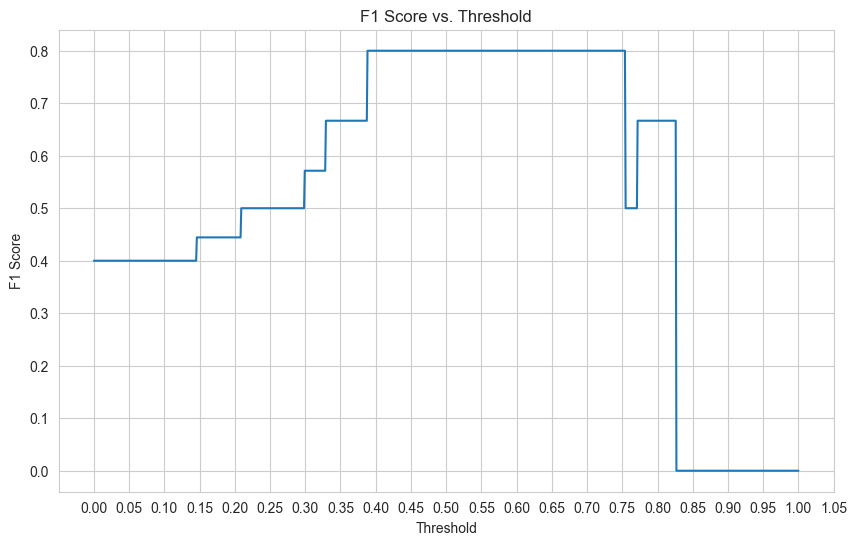

In [320]:
thresholds = np.linspace(0, 1, 1000)
f1_scores = []
y_scores = logistic_model.predict_proba(X_test)[:,1]
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.title('F1 Score vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

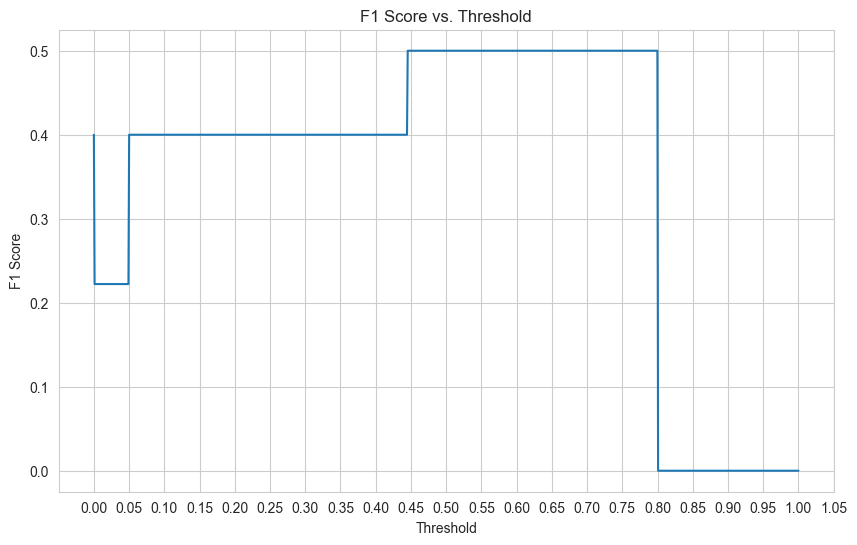

In [321]:
thresholds = np.linspace(0, 1, 1000)
f1_scores = []
y_scores = decision_tree_model.predict_proba(X_test)[:,1]
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.title('F1 Score vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

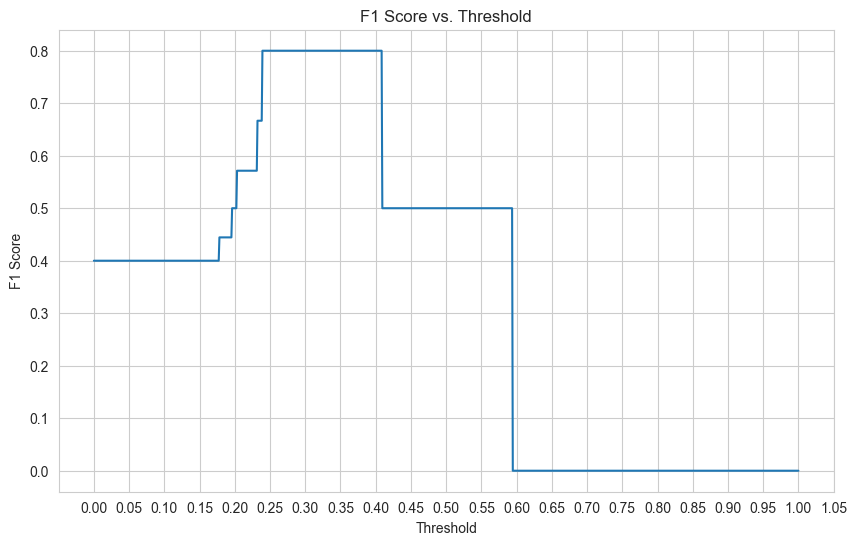

In [322]:
thresholds = np.linspace(0, 1, 1000)
f1_scores = []
y_scores = forest_model.predict_proba(X_test)[:,1]
for threshold in thresholds:
    y_pred = [1 if score >= threshold else 0 for score in y_scores]
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.title('F1 Score vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.show()

In [323]:
knn_threshold = 0.55
logistic_threshold = 0.55
decision_tree_threshold = 0.55
forest_threshold = 0.3

In [324]:
y_scores = knn_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= knn_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_pred))

Accuracy:  0.875
Precision:  1.0
Recall:  0.5
F1:  0.6666666666666666
ROC-AUC 0.75


In [325]:
y_scores = logistic_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= logistic_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_pred))

Accuracy:  0.875
Precision:  0.6666666666666666
Recall:  1.0
F1:  0.8
ROC-AUC 0.9166666666666667


In [326]:
y_scores = decision_tree_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= decision_tree_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_pred))

Accuracy:  0.75
Precision:  0.5
Recall:  0.5
F1:  0.5
ROC-AUC 0.6666666666666666


In [327]:
y_scores = forest_model.predict_proba(X_test)[:,1]
y_pred = [1 if score >= forest_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC-AUC', roc_auc_score(y_test, y_pred))

Accuracy:  0.875
Precision:  0.6666666666666666
Recall:  1.0
F1:  0.8
ROC-AUC 0.9166666666666667


ТЕПЕРЬ ОБУЧАЮЩИЕ ДАННЫЕ

In [328]:
y_scores = knn_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= knn_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_train, y_pred))
print('Precision: ', precision_score(y_train, y_pred))
print('Recall: ', recall_score(y_train, y_pred))
print('F1: ', f1_score(y_train, y_pred))
print('ROC-AUC', roc_auc_score(y_train, y_pred))

Accuracy:  0.7073170731707317
Precision:  1.0
Recall:  0.07692307692307693
F1:  0.14285714285714288
ROC-AUC 0.5384615384615384


In [329]:
y_scores = logistic_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= logistic_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_train, y_pred))
print('Precision: ', precision_score(y_train, y_pred))
print('Recall: ', recall_score(y_train, y_pred))
print('F1: ', f1_score(y_train, y_pred))
print('ROC-AUC', roc_auc_score(y_train, y_pred))

Accuracy:  0.7804878048780488
Precision:  0.8333333333333334
Recall:  0.38461538461538464
F1:  0.5263157894736842
ROC-AUC 0.6744505494505494


In [330]:
y_scores = decision_tree_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= decision_tree_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_train, y_pred))
print('Precision: ', precision_score(y_train, y_pred))
print('Recall: ', recall_score(y_train, y_pred))
print('F1: ', f1_score(y_train, y_pred))
print('ROC-AUC', roc_auc_score(y_train, y_pred))

Accuracy:  0.8292682926829268
Precision:  0.8
Recall:  0.6153846153846154
F1:  0.6956521739130435
ROC-AUC 0.771978021978022


In [331]:
y_scores = forest_model.predict_proba(X_train)[:,1]
y_pred = [1 if score >= forest_threshold else 0 for score in y_scores]

print('Accuracy: ', accuracy_score(y_train, y_pred))
print('Precision: ', precision_score(y_train, y_pred))
print('Recall: ', recall_score(y_train, y_pred))
print('F1: ', f1_score(y_train, y_pred))
print('ROC-AUC', roc_auc_score(y_train, y_pred))

Accuracy:  0.7804878048780488
Precision:  0.6428571428571429
Recall:  0.6923076923076923
F1:  0.6666666666666666
ROC-AUC 0.7568681318681318


In [332]:
logistic_model.best_estimator_.coef_

array([[ 0.65518319, -0.1437151 ,  0.61950695, -1.04295928, -0.19764418,
        -0.60034265, -0.66254605, -0.7612428 ,  0.42540211]])

TypeError: range() takes no keyword arguments

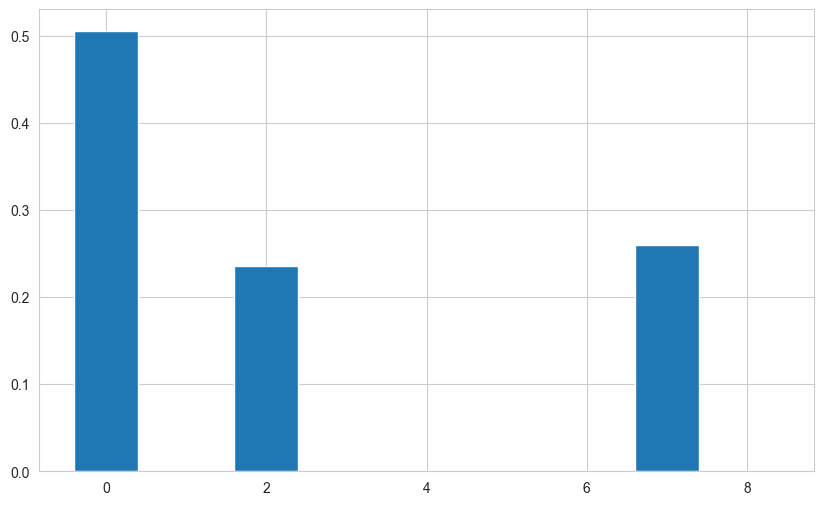

In [333]:
feature_importance = decision_tree_model.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance), labels=X.columns))
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в модели дерева решений')
plt.show()

TypeError: range() takes no keyword arguments

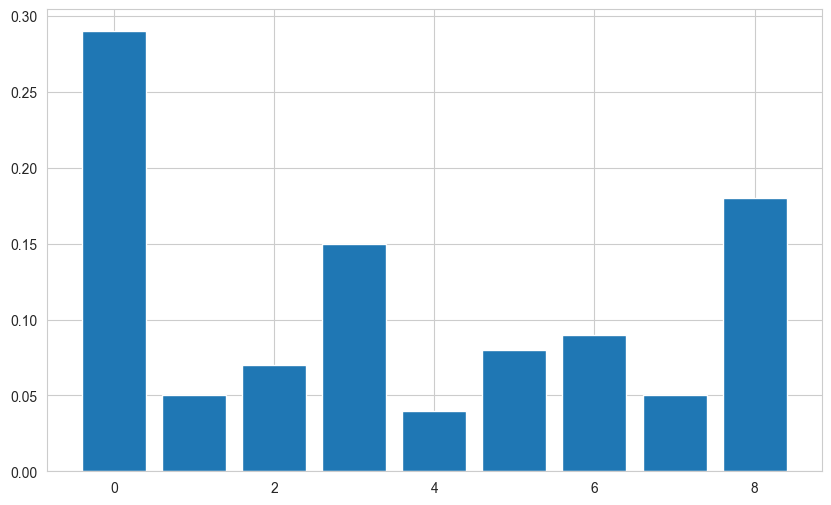

In [334]:
feature_importance = forest_model.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance), labels=X.columns))
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в модели дерева решений')
plt.show()